In [1]:
import pandas as pd
import numpy as np
import json
import warnings
import matplotlib as mlp
import matplotlib.pyplot as plt
import timeit


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [2]:
with open('hh_ru1.json', 'r') as file:
    json_data = json.load(file)

In [3]:
df = pd.json_normalize(json_data)
df = df.drop([
    'relations', 'working_days','addition_info.specializations',

    'accept_incomplete_resumes','accept_temporary', 'adv_context', 'adv_response_url', 'alternate_url', 'apply_alternate_url', 'archived',
    'contacts', 'department', 'has_test', 'insider_interview', 'is_adv_vacancy', 'premium', 'sort_point_distance', 'response_letter_required',
    'response_url', 'show_logo_in_search', 'url','working_time_intervals','working_time_modes',    
    'addition_info.accept_handicapped', 'addition_info.accept_incomplete_resumes','addition_info.accept_kids','addition_info.accept_temporary',
    'addition_info.address.building','addition_info.address.description','addition_info.address.lat','addition_info.address.lng','addition_info.address.metro',
    'addition_info.address.metro_stations','addition_info.allow_messages','addition_info.address.street', 'addition_info.alternate_url',
    'addition_info.apply_alternate_url','addition_info.approved','addition_info.archived','addition_info.area.id',
    'addition_info.area.url', 'addition_info.billing_type.id' ,'addition_info.code','addition_info.contacts','addition_info.created_at',
    'addition_info.department','addition_info.driver_license_types', 'addition_info.driver_license_types','addition_info.employer.alternate_url',
    'addition_info.employer.id','addition_info.employer.logo_urls.240','addition_info.employer.logo_urls.90','addition_info.employer.logo_urls.original',
    'addition_info.employer.trusted', 'addition_info.employer.url', 'addition_info.employer.vacancies_url','addition_info.employment.id', 
    'addition_info.experience.name','addition_info.has_test','addition_info.hidden','addition_info.id','addition_info.initial_created_at',
    'addition_info.insider_interview','addition_info.negotiations_url', 'addition_info.premium','addition_info.published_at','addition_info.quick_responses_allowed',
    'addition_info.relations','addition_info.response_letter_required', 'addition_info.response_url','addition_info.salary', 'addition_info.schedule.id',
    'addition_info.suitable_resumes_url','addition_info.test', 'addition_info.type.id', 'addition_info.type.name','addition_info.vacancy_constructor_template',
    'addition_info.working_time_intervals','addition_info.working_days','addition_info.working_time_modes','address.building','address.description',
    'address.id','address.lat','address.lng','address.metro','address.metro_stations','address.street','area.id','area.url','employer.alternate_url',
    'employer.id','employer.logo_urls.240','employer.logo_urls.90','employer.logo_urls.original','employer.trusted','type.id','type.name',
    'employer.url','employer.vacancies_url','employment.id','employment.name','experience.id',
    'addition_info.salary.from','addition_info.salary.gross','schedule.id','address','addition_info.address','addition_info.address.metro.lat','addition_info.address.metro.line_id',
    'addition_info.address.metro.lng','addition_info.address.metro.station_id','addition_info.address.metro.station_name','addition_info.department.id',
    'address.metro.lat','address.metro.line_id','address.metro.line_name','address.metro.lng','address.metro.station_id',
    'addition_info.salary.to','addition_info.salary.currency','addition_info.schedule.name', 'salary', 'addition_info.employer.accredited_it_employer',
    'addition_info.address.metro.line_name','addition_info.department.name','branding.tariff','department.id','addition_info.insider_interview.id',
    'addition_info.insider_interview.url','insider_interview.id','insider_interview.url','addition_info.vacancy_constructor_template.bottom_picture',
    'addition_info.vacancy_constructor_template.id','addition_info.vacancy_constructor_template.name','addition_info.vacancy_constructor_template.top_picture.blurred_path',
    'addition_info.vacancy_constructor_template.top_picture.height','addition_info.vacancy_constructor_template.top_picture.path','addition_info.vacancy_constructor_template.top_picture.width',
    'addition_info.employer.logo_urls','employer.logo_urls','addition_info.vacancy_constructor_template.bottom_picture.blurred_path','addition_info.vacancy_constructor_template.bottom_picture.height',
    'addition_info.vacancy_constructor_template.bottom_picture.path','addition_info.vacancy_constructor_template.bottom_picture.width','brand_snippet.background.color','brand_snippet.background.gradient',
    'brand_snippet.logo','brand_snippet.logo_scalable.default.height','brand_snippet.logo_scalable.default.url','brand_snippet.logo_scalable.default.width',
    'brand_snippet.logo_scalable.xs.height','brand_snippet.logo_scalable.xs.url','brand_snippet.logo_scalable.xs.width','brand_snippet.logo_xs',
    'brand_snippet.picture','brand_snippet.picture_scalable.default.height','brand_snippet.picture_scalable.default.url',
    'brand_snippet.picture_scalable.xs.height','brand_snippet.picture_scalable.xs.url', 'brand_snippet.picture_scalable.xs.width','brand_snippet.picture_xs',
    'addition_info.test.required','addition_info.video_vacancy.cover_picture.resized_height','addition_info.video_vacancy.cover_picture.resized_path','addition_info.video_vacancy.cover_picture.resized_width',
    'brand_snippet.picture_scalable.default.width','addition_info.video_vacancy.video_url',
    'addition_info.billing_type.name', 'addition_info.address.city', 'addition_info.address.raw','addition_info.area.name','experience.name',
    'address.raw',
    'created_at',
    'published_at',
    'addition_info.name',
    'snippet.responsibility',
    'addition_info.description', 'snippet.requirement','name','employer.name','addition_info.employer.name','department.name'
], axis=1)

df.set_index('id')

df.head()

,id,professional_roles,addition_info.employment.name,addition_info.experience.id,addition_info.key_skills,addition_info.languages,addition_info.professional_roles,address.city,area.name,employer.accredited_it_employer,salary.currency,salary.from,salary.gross,salary.to,schedule.name,address.metro.station_name,branding.type
0,106197099,"[{'id': '96', 'name': 'Программист, разработчи...",Полная занятость,noExperience,"[{'name': 'C/C++'}, {'name': 'Английский язык'}]",[],"[{'id': '96', 'name': 'Программист, разработчи...",Берлин,Санкт-Петербург,False,EUR,7500.0,True,10834.0,Полный день,NaN,NaN
1,105950860,"[{'id': '107', 'name': 'Руководитель проектов'}]",Полная занятость,between3And6,"[{'name': 'Разработка бизнес-требований'}, {'n...",[],"[{'id': '107', 'name': 'Руководитель проектов'}]",NaN,Алматы,False,KZT,300000.0,False,500000.0,Полный день,NaN,NaN
2,104468824,"[{'id': '150', 'name': 'Бизнес-аналитик'}]",Полная занятость,between1And3,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...","[{'id': 'eng', 'level': {'id': 'b2', 'name': '...","[{'id': '150', 'name': 'Бизнес-аналитик'}]",Москва,Москва,True,NaN,NaN,NaN,NaN,Полный день,Деловой центр,MAKEUP
3,105382430,"[{'id': '96', 'name': 'Программист, разработчи...",Полная занятость,between1And3,[],[],"[{'id': '96', 'name': 'Программист, разработчи...",NaN,Москва,False,NaN,NaN,NaN,NaN,Полный день,NaN,MAKEUP
4,105516822,"[{'id': '83', 'name': 'Оператор call-центра, с...",Полная занятость,noExperience,"[{'name': 'Пользователь ПК'}, {'name': 'Грамот...",[],"[{'id': '83', 'name': 'Оператор call-центра, с...",NaN,Саратов,False,RUR,40000.0,False,60000.0,Удаленная работа,NaN,MAKEUP


In [4]:
df['role'] = df['professional_roles'].apply(lambda x: x[0]['name'])
df = df.drop(['professional_roles'],axis=True)
df.head()

,id,addition_info.employment.name,addition_info.experience.id,addition_info.key_skills,addition_info.languages,addition_info.professional_roles,address.city,area.name,employer.accredited_it_employer,salary.currency,salary.from,salary.gross,salary.to,schedule.name,address.metro.station_name,branding.type,role
0,106197099,Полная занятость,noExperience,"[{'name': 'C/C++'}, {'name': 'Английский язык'}]",[],"[{'id': '96', 'name': 'Программист, разработчи...",Берлин,Санкт-Петербург,False,EUR,7500.0,True,10834.0,Полный день,NaN,NaN,"Программист, разработчик"
1,105950860,Полная занятость,between3And6,"[{'name': 'Разработка бизнес-требований'}, {'n...",[],"[{'id': '107', 'name': 'Руководитель проектов'}]",NaN,Алматы,False,KZT,300000.0,False,500000.0,Полный день,NaN,NaN,Руководитель проектов
2,104468824,Полная занятость,between1And3,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...","[{'id': 'eng', 'level': {'id': 'b2', 'name': '...","[{'id': '150', 'name': 'Бизнес-аналитик'}]",Москва,Москва,True,NaN,NaN,NaN,NaN,Полный день,Деловой центр,MAKEUP,Бизнес-аналитик
3,105382430,Полная занятость,between1And3,[],[],"[{'id': '96', 'name': 'Программист, разработчи...",NaN,Москва,False,NaN,NaN,NaN,NaN,Полный день,NaN,MAKEUP,"Программист, разработчик"
4,105516822,Полная занятость,noExperience,"[{'name': 'Пользователь ПК'}, {'name': 'Грамот...",[],"[{'id': '83', 'name': 'Оператор call-центра, с...",NaN,Саратов,False,RUR,40000.0,False,60000.0,Удаленная работа,NaN,MAKEUP,"Оператор call-центра, специалист контактного ц..."


#### Колонки с объектами скилов и ролей трансформируем в списки наименований

In [5]:
df['key_skills'] = df['addition_info.key_skills'].apply(lambda x: list(map(lambda y: y['name'], x)))
df = df.drop(['addition_info.key_skills'],axis=True)

df['roles'] = df['addition_info.professional_roles'].apply(lambda x: list(map(lambda y: y['name'], x)))
df = df.drop(['addition_info.professional_roles', 'roles'],axis=True)
df.head()

,id,addition_info.employment.name,addition_info.experience.id,addition_info.languages,address.city,area.name,employer.accredited_it_employer,salary.currency,salary.from,salary.gross,salary.to,schedule.name,address.metro.station_name,branding.type,role,key_skills
0,106197099,Полная занятость,noExperience,[],Берлин,Санкт-Петербург,False,EUR,7500.0,True,10834.0,Полный день,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]"
1,105950860,Полная занятость,between3And6,[],NaN,Алматы,False,KZT,300000.0,False,500000.0,Полный день,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада..."
2,104468824,Полная занятость,between1And3,"[{'id': 'eng', 'level': {'id': 'b2', 'name': '...",Москва,Москва,True,NaN,NaN,NaN,NaN,Полный день,Деловой центр,MAKEUP,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке..."
3,105382430,Полная занятость,between1And3,[],NaN,Москва,False,NaN,NaN,NaN,NaN,Полный день,NaN,MAKEUP,"Программист, разработчик",[]
4,105516822,Полная занятость,noExperience,[],NaN,Саратов,False,RUR,40000.0,False,60000.0,Удаленная работа,NaN,MAKEUP,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком..."


#### Нормализуем колонку с ин.языками

In [6]:
df['languages'] = df['addition_info.languages'].apply(lambda x: list(map(lambda y: y['id'], x)))
df = df.drop(['addition_info.languages'],axis=True)
def check_eng(arr):
    if 'eng' in arr:
        return True
    return False


df['need_eng'] = df.apply(lambda x: check_eng(x['languages']), axis=1)
df = df.drop(['languages'],axis=True)

df.head()


,id,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,salary.currency,salary.from,salary.gross,salary.to,schedule.name,address.metro.station_name,branding.type,role,key_skills,need_eng
0,106197099,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,EUR,7500.0,True,10834.0,Полный день,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]",False
1,105950860,Полная занятость,between3And6,NaN,Алматы,False,KZT,300000.0,False,500000.0,Полный день,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада...",False
2,104468824,Полная занятость,between1And3,Москва,Москва,True,NaN,NaN,NaN,NaN,Полный день,Деловой центр,MAKEUP,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке...",True
3,105382430,Полная занятость,between1And3,NaN,Москва,False,NaN,NaN,NaN,NaN,Полный день,NaN,MAKEUP,"Программист, разработчик",[],False
4,105516822,Полная занятость,noExperience,NaN,Саратов,False,RUR,40000.0,False,60000.0,Удаленная работа,NaN,MAKEUP,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком...",False


#### Конвертируем колонки с зарплатами в рубли

##### Получим актуальный курс валют по отношению к рублю

In [7]:
import requests
response = requests.get('https://api.exchangerate-api.com/v4/latest/RUB')
if response.status_code == 200:
    data = response.json()
    currency_data = data['rates']
else:
    raise Error('Ошибка при получении данных:', response.status_code)

In [8]:
def convert_salary(currency, salary):
    if 'RUR' == currency or 'RUB' == currency:
        return salary
    if None != currency and None != salary:
        k = currency_data.get(currency)
        if None != k:
            return salary / k
    return None

df['salary'] = df.apply(lambda x: convert_salary(x['salary.currency'], x['salary.to']), axis=1)
df = df.drop([
    'salary.to', 'salary.from', 'salary.currency', 'salary.gross',
], axis=True)


In [9]:
df.head()

,id,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,schedule.name,address.metro.station_name,branding.type,role,key_skills,need_eng,salary
0,106197099,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,Полный день,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]",False,1.138025e+06
1,105950860,Полная занятость,between3And6,NaN,Алматы,False,Полный день,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада...",False,9.746589e+04
2,104468824,Полная занятость,between1And3,Москва,Москва,True,Полный день,Деловой центр,MAKEUP,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке...",True,NaN
3,105382430,Полная занятость,between1And3,NaN,Москва,False,Полный день,NaN,MAKEUP,"Программист, разработчик",[],False,NaN
4,105516822,Полная занятость,noExperience,NaN,Саратов,False,Удаленная работа,NaN,MAKEUP,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком...",False,6.000000e+04


#### Удаляем html теги из колонок с описанием

In [10]:
keywords = [
  "ml engineer",
  "employment",
  "продуктовая аналитика",
  "bokeh",
  "databricks",
  "numpy",
  "git",
  "графовые базы данных",
  "orange",
  "google cloud platform",
  "кластеризация",
  "aws",
  "fastapi",
  "presto",
  "branding",
  "blockchain",
  "apache spark",
  "matplotlib",
  "sas",
  "инструменты bi (business intelligence)",
  "обработка естественного языка",
  "временные ряды",
  "ml инженер",
  "azure",
  "elasticsearch",
  "dataiku",
  "системы мониторинга",
  "clickhouse",
  "knime",
  "power bi",
  "google bigquery",
  "theano",
  "colab",
  "shiny",
  "интерпретация данных",
  "классификация",
  "data wrangling",
  "apache flink",
  "rapidminer",
  "asinc.io",
  "sql",
  "postgresql",
  "чистка данных",
  "datarobot",
  "vaex",
  "интерпретируемость моделей",
  "snowflake",
  "английский язык",
  "pytorch",
  "статистика",
  "tidytext",
  "nosql",
  "plotly",
  "кросс-валидация",
  "scikit-learn",
  "нейронные сети",
  "а/б тестирование",
  "глубокое обучение",
  "spark",
  "коммуникационные навыки",
  "chainer",
  "обработка данных",
  "математика",
  "большие данные",
  "моделирование",
  "devops для data science",
  "тайм-менеджмент",
  "computer vision",
  "keras tuner",
  "дата-майнинг",
  "grafana",
  "llm",
  "flask",
  "lightgbm",
  "nltk",
  "streamlit",
  "flutter",
  "тестирование гипотез",
  "r",
  "data scientist",
  "gensim",
  "математический анализ",
  "dash",
  "redis",
  "tableau prep",
  "машинное обучение",
  "дата-аналитика",
  "tensorboard",
  "hadoop",
  "математическая статистика",
  "обучение и развитие",
  "api",
  "amazon redshift",
  "анализ данных",
  "pyspark",
  "компьютерное зрение",
  "обучение с подкреплением",
  "data инженер",
  "google analytics",
  "ml разработчик",
  "spss",
  "node.js",
  "обучение с учителем",
  "jupyter notebook",
  "mlflow",
  "искусственный интеллект",
  "kubernetes",
  "kibana",
  "методы ансамблирования",
  "sqlite",
  "обучение без учителя",
  "дата-сайенс",
  "apache airflow",
  "bioinformatics",
  "alteryx",
  "h2o.ai",
  "командная работа",
  "гиперпараметры",
  "c/c++",
  "mysql",
  "рекомендательные системы",
  "qlikview",
  "wandb",
  "big data",
  "этика в ии",
  "оптимизация",
  "microsoft power query",
  "специалист по машинному обучению",
  "fast api",
  "составление семантического ядра",
  "научный сотрудник по данным",
  "прогнозирование",
  "критическое мышление",
  "математическое моделирование",
  "скрипты автоматизации",
  "apache nifi",
  "ray",
  "инженер по данным",
  "python",
  "xgboost",
  "tableau",
  "d3.js",
  "аналитика",
  "работа в команде",
  "pandas",
  "seaborn",
  "recommender systems",
  "apache beam",
  "применение ии в бизнесе",
  "opencv",
  "spacy",
  "регрессия",
  "nlp",
  "модели предсказания",
  "tidyverse",
  "junior",
  "middle",
  "mongodb",
  "prometheus",
  "etl",
  "matlab",
  "tensorflow",
  "apache kafka",
  "проблемное мышление",
  "стремление к профессиональному росту",
  "osi",
  "data science",
  "google cloud",
  "dask",
  "сбор данных",
  "keras",
  "optuna",
  "looker",
  "docker",
  "визуализация данных",
  "weights & biases",
  "анализ временных рядов",
  "caffe",
  "druid",
  "базы данных",
  "catboost",
  "data engineer",
  "графовые модели",
  "доменные знания"
]


#### Фильтруем скилы, оставим только те вакансии, в которых есть упоминание о ключевых словах в DS

In [11]:
def keyworkds_contains_word(word):
    cleaned_word = re.sub(r'[^a-zA-Z0-9а-яА-ЯёЁ]', '', word).lower()
    for string in keywords:
        cleaned_string = re.sub(r'[^a-zA-Z0-9а-яА-ЯёЁ]', '', string).lower()
        if cleaned_word in cleaned_string:
            return True
    return False

def filter_skill(skills):
    filtered_skills = list()
    for i in range(len(skills)):
        if skills[i].lower() in keywords :
            filtered_skills.append(skills[i].lower())
    return filtered_skills
df['skills'] = df.apply(lambda x: filter_skill(x['key_skills']), axis=1)
df = df.drop(['key_skills'], axis=True)
df = df[df['skills'].apply(len) > 0]
df.head()

,id,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,schedule.name,address.metro.station_name,branding.type,role,need_eng,salary,skills
0,106197099,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,Полный день,NaN,NaN,"Программист, разработчик",False,1.138025e+06,"[c/c++, английский язык]"
1,105950860,Полная занятость,between3And6,NaN,Алматы,False,Полный день,NaN,NaN,Руководитель проектов,False,9.746589e+04,"[big data, data science]"
2,104468824,Полная занятость,between1And3,Москва,Москва,True,Полный день,Деловой центр,MAKEUP,Бизнес-аналитик,True,NaN,"[sql, python, математическая статистика]"
4,105516822,Полная занятость,noExperience,NaN,Саратов,False,Удаленная работа,NaN,MAKEUP,"Оператор call-центра, специалист контактного ц...",False,6.000000e+04,[работа в команде]
5,105464428,Полная занятость,between1And3,NaN,Москва,True,Удаленная работа,NaN,NaN,"Программист, разработчик",False,NaN,"[python, data science, numpy, pytorch, c/c++]"


#### Применим One-Hot Encoding для ключевых скилов в DS

In [12]:
df['skills'] = df['skills'].apply(lambda x: ','.join(x))
data_encoded = pd.get_dummies(df['skills'].str.get_dummies(sep=','), prefix='skill', prefix_sep='')

df = pd.concat([df, data_encoded], axis=1)
df = df.drop('skills', axis=1)

print(df.shape)
df.head()


(1660, 118)


,id,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,schedule.name,address.metro.station_name,branding.type,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент
0,106197099,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,Полный день,NaN,NaN,"Программист, разработчик",False,1.138025e+06,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,105950860,Полная занятость,between3And6,NaN,Алматы,False,Полный день,NaN,NaN,Руководитель проектов,False,9.746589e+04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,104468824,Полная занятость,between1And3,Москва,Москва,True,Полный день,Деловой центр,MAKEUP,Бизнес-аналитик,True,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,105516822,Полная занятость,noExperience,NaN,Саратов,False,Удаленная работа,NaN,MAKEUP,"Оператор call-центра, специалист контактного ц...",False,6.000000e+04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,105464428,Полная занятость,between1And3,NaN,Москва,True,Удаленная работа,NaN,NaN,"Программист, разработчик",False,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Переименуем некоторые колонки

In [13]:
df['is_it_company'] = df['employer.accredited_it_employer']
df = df.drop(['employer.accredited_it_employer'],axis=True)

#### Обработаем некоторые порядковые категориальные колонки

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['role'] = label_encoder.fit_transform(df['role'])
df['employment'] = label_encoder.fit_transform(df['addition_info.employment.name'])
df['experience'] = label_encoder.fit_transform(df['addition_info.experience.id'])
df['schedule'] = label_encoder.fit_transform(df['schedule.name'])
df['metro'] = label_encoder.fit_transform(df['address.metro.station_name'])
df['branding'] = label_encoder.fit_transform(df['branding.type'])
df = df.drop(['addition_info.employment.name', 'addition_info.experience.id', 'schedule.name', 'address.metro.station_name', 'branding.type'],axis=True)
df.head()

,id,address.city,area.name,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding
0,106197099,Берлин,Санкт-Петербург,24,False,1.138025e+06,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,3,1,113,2
1,105950860,NaN,Алматы,30,False,9.746589e+04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,1,1,113,2
2,104468824,Москва,Москва,4,True,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,0,0,1,29,1
4,105516822,NaN,Саратов,22,False,6.000000e+04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,0,3,3,113,1
5,105464428,NaN,Москва,24,False,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,0,0,3,113,2


#### Применим One-Hot Encoding для города в адресе

In [15]:
def select_city(area_city, company_city):
    if None != area_city:
        return area_city
    return company_city
    
df['city'] = df.apply(lambda x: select_city(x['area.name'], x['address.city']), axis=1)
df['city'] = df['city'].str.lower()
df = df.drop(['area.name','address.city'], axis=True)
df['city'] = label_encoder.fit_transform(df['city'])

df.head()

,id,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding,city
0,106197099,24,False,1.138025e+06,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,3,1,113,2,80
1,105950860,30,False,9.746589e+04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,1,1,113,2,2
2,104468824,4,True,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,0,0,1,29,1,59
4,105516822,22,False,6.000000e+04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,0,3,3,113,1,81
5,105464428,24,False,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,0,0,3,113,2,59


#### Заполним пропуски

In [16]:
df.columns[df.isna().any()].tolist()

['salary', 'is_it_company']

In [17]:
### Заполним средним
numeric_columns = df.loc[:,df.dtypes!='object'].columns
df['is_it_company'] = df['is_it_company'].fillna(df['is_it_company'].mean() > 0.5).astype(int)
df['need_eng'] = df['need_eng'].astype(int)
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
df.describe()


,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding,city
count,1660.000000,1660.000000,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000
mean,17.124096,0.144578,3.578688e+05,0.048795,0.037349,0.004819,0.022289,0.024096,0.000602,0.023494,0.005422,0.088554,0.001807,0.001205,0.001205,0.027108,0.001807,0.006024,0.080723,0.030723,0.010241,0.006024,0.046386,0.004217,0.004217,0.000602,0.135542,0.011446,0.121084,0.001205,0.024699,0.012651,0.003012,0.109036,0.008434,0.002410,0.002410,0.027711,0.073494,0.003614,0.008434,0.001205,0.107831,0.003012,0.014458,0.000602,0.007229,0.007831,0.017470,0.031928,0.025904,0.031325,0.010843,0.038554,0.043373,0.017470,0.003012,0.045181,0.003614,0.160843,0.047590,0.000602,0.016867,0.024699,0.592169,0.063855,0.001807,0.015663,0.003012,0.031928,0.004217,0.010843,0.003614,0.006627,0.066265,0.001807,0.468675,0.001807,0.000602,0.027711,0.028313,0.001205,0.003614,0.001205,0.048193,0.012048,0.122892,0.050000,0.003614,0.001205,0.003614,0.003012,0.050602,0.040361,0.016867,0.019880,0.002410,0.004819,0.000602,0.013855,0.003012,0.000602,0.011446,0.004217,0.000602,0.001205,0.006627,0.003614,0.001807,0.320482,0.116265,0.975904,1.490964,100.557229,1.545181,59.816265
std,12.512813,0.351781,1.020239e+05,0.215504,0.189674,0.069274,0.147667,0.153395,0.024544,0.151512,0.073454,0.284185,0.042486,0.034700,0.034700,0.162448,0.042486,0.077404,0.272491,0.172618,0.100708,0.077404,0.210382,0.064

In [18]:
df.head()

,id,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding,city
0,106197099,24,0,1.138025e+06,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,113,2,80
1,105950860,30,0,9.746589e+04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,113,2,2
2,104468824,4,1,3.578688e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,29,1,59
4,105516822,22,0,6.000000e+04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,113,1,81
5,105464428,24,0,3.578688e+05,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,113,2,59


### Изучим корелляции вещественных признаков

In [19]:
df[numeric_columns].corr()

,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,employment,experience,schedule,metro,branding,city
role,1.000000,0.074387,0.040975,-0.037789,0.009221,-2.363809e-02,-0.034446,0.117149,0.013495,-0.034923,-9.913863e-03,-0.099374,0.023389,0.031585,-4.754516e-02,0.091754,-1.516211e-02,-0.039358,-0.047313,0.016373,5.591282e-02,-0.056161,-0.079353,-0.066788,-4.226332e-02,-1.987051e-02,0.025616,0.048733,0.024071,0.019091,0.056755,0.031195,0.030213,0.040101,-0.046204,-3.191911e-02,0.012281,-0.041282,-0.033061,-0.043129,-2.724590e-02,6.212683e-02,-0.004225,-4.887949e-02,-0.031056,-1.594512e-02,-0.005394,-0.060978,-0.048005,0.046135,0.023545,-0.081957,-0.036379,-0.007489,-0.067837,0.011542,0.066244,-0.082382,-0.063993,0.108912,-0.092020,-2.968398e-02,-0.065248,-0.077598,-0.278893,-0.054985,-2.876827e-02,-0.125751,-0.048879,0.066953,-4.077697e-02,-0.040564,-5.837584e-02,-3.642423e-02,0.000842,-4.350826e-02,-0.160734,0.023389,1.349530e-02,-0.074729,0.001210,0.019091,-4.714117e-02,-0.032274,-0.140293,-0.039939,-0.064440,-0.057517,-0.043129,-3.782739e-02,3.631643e-02,0.025819,-0.151476,-0.165248,-0.066744,-0.048334,-4.272371e-02,-0.009035,-1.987051e-02,0.057739,-5.151590e-02,-0.033609,0.089480,-0.031116,-3.164668e-02,-0.003121,-8.984520e-02,0.013045,0.005247,-0.190897,-0.097028,0.003813,0.011325,0.005246,0.050969
need_eng,0.074387,1.000000,0.010783,-0.021554,0.000327,-2.860892e-02,0.065568,-0.008748,-0.010093,0.071943,8.628271e-02,-0.073879,-0.017493,0.084481,-1.427855e-02,-0.047529,-1.749286e-02,-0.032005,-0.033790,-0.013634,2.474254e-01,-0.032005,-0.033658,-0.026753,1.318545e-01,-1.009342e-02,0.047390,0.004074,0.036440,-0.014279,-0.032313,-0.000554,0.039921,-0.066877,0.093208,8.460891e-02,0.084609,-0.027661,-0.089530,-0.024761,-4.513685e-04,-1.427855e-02,0.033802,-2.259683e-02,-0.006743,-1.009342e-02,0.066021,-0.017092,-0.028670,0.198156,0.051580,-0.005095,0.006576,0.131206,-0.045492,-0.002520,0.008662,-0.056440,-0.024761,0.015842,0.141435,-1.009342e-02,-0.013943,0.033908,-0.066648,-0.016291,-1.749286e-02,0.072303,-0.022597,0.052004,7.898533e-02,0.006576,-2.476107e-02,1.564403e-01,0.048869,6.316866e-02,-0.070308,-0.017493,-1.009342e-02,0.149748,0.012443,0.084481,-2.476107e-02,0.035101,-0.020525,-0.029699,0.206123,-0.023579,0.032327,-1.427855e-02,3.782940e-03,-0.022597,0.006685,-0.066905,0.025963,0.027353,-2.020511e-02,-0.003874,-1.009342e-02,-0.019422,8.662117e-03,-0.010093,0.036282,-0.026753,-1.009342e-02,-0.014279,-3.357743e-02,-0.024761,0.022838,-0.013929,0.039352,0.115982,0.045616,0.217750,-0.073690
salary,0.040975,0.010783,1.000000,-0.009793,-0.080748,-3.510263e-17,-0.095571,-0.032496,0.090852,0.016979,-3.743070e-17,-0.120132,0.106523,0.094981,-1.161711e-16,0.446499,-1.494727e-16,0.008688,-0.004659,-0.030591,-8.307409e-17,-0.008233,0.022290,0.01978

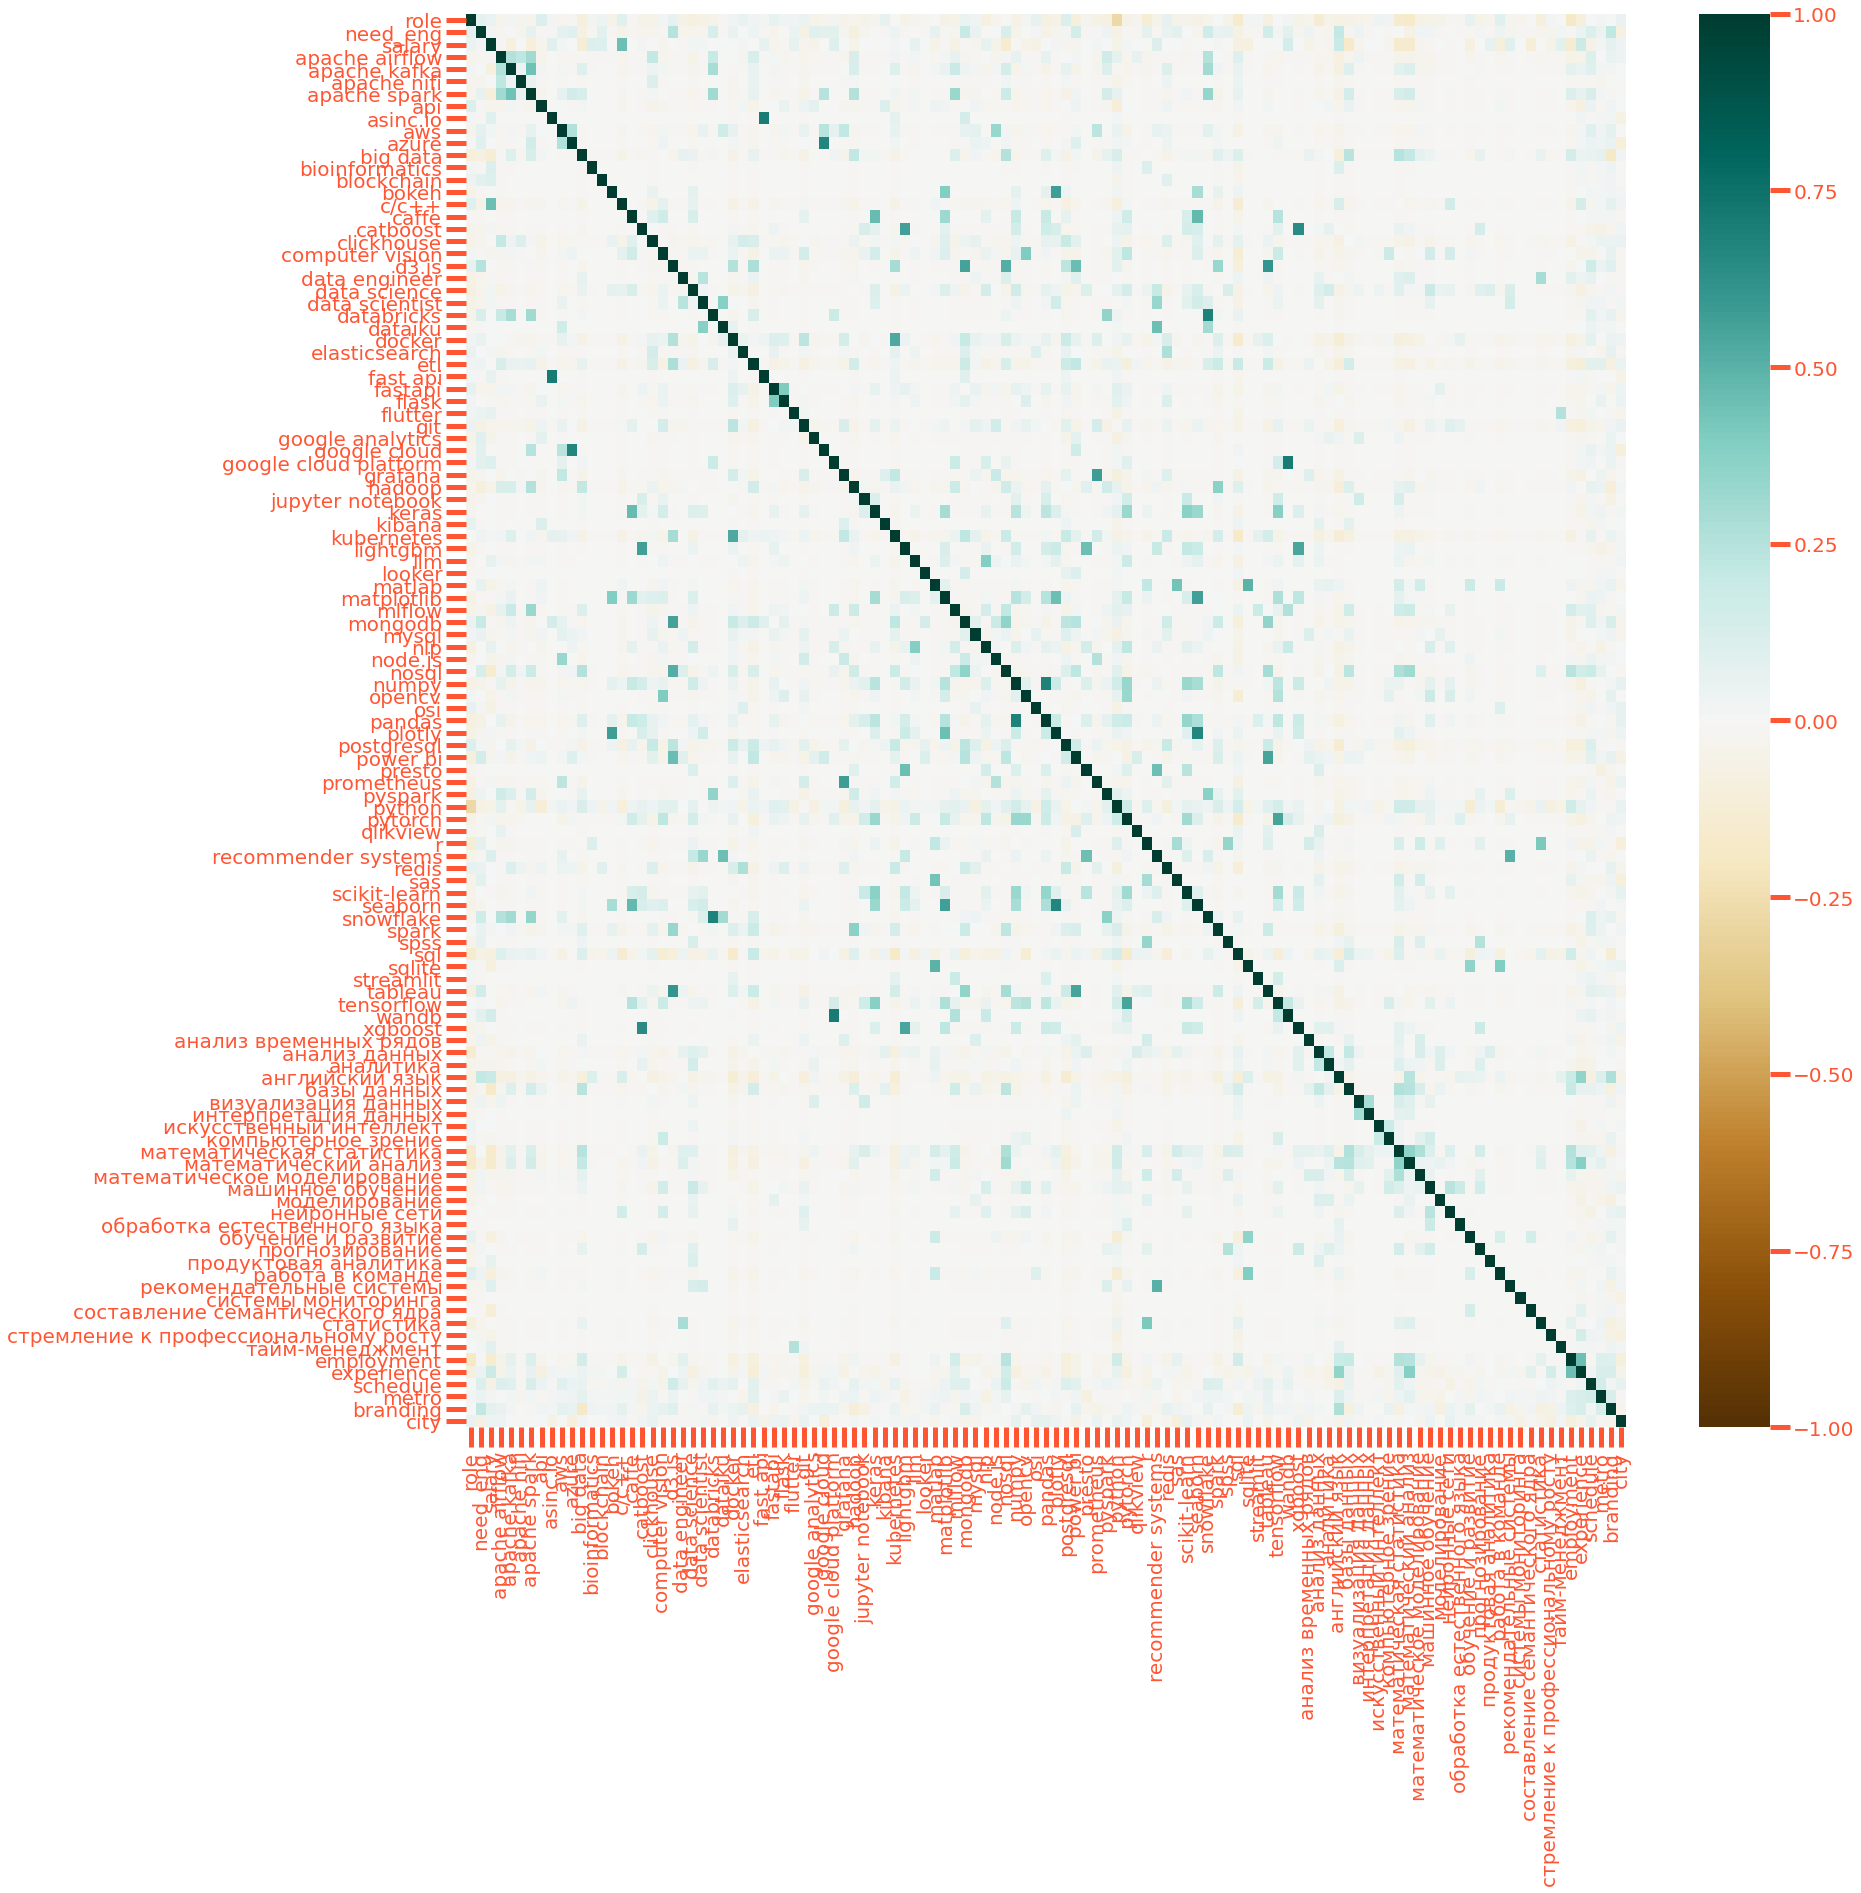

In [20]:
### Изобразим в виде Тепловой карты
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(26, 26)
sns.heatmap(df[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)
plt.show()

In [21]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
asinc.io               fast api        0.706894
google cloud platform  wandb           0.706680
databricks             snowflake       0.682176
numpy                  pandas          0.679857
azure                  google cloud    0.665659
plotly                 seaborn         0.665457
catboost               xgboost         0.643935
d3.js                  tableau         0.602530
bokeh                  plotly          0.576653
grafana                prometheus      0.576378
dtype: float64


In [22]:
print(df['salary'].describe())

count    1.660000e+03
mean     3.578688e+05
std      1.020239e+05
min      2.500000e+04
25%      3.578688e+05
50%      3.578688e+05
75%      3.578688e+05
max      1.138025e+06
Name: salary, dtype: float64


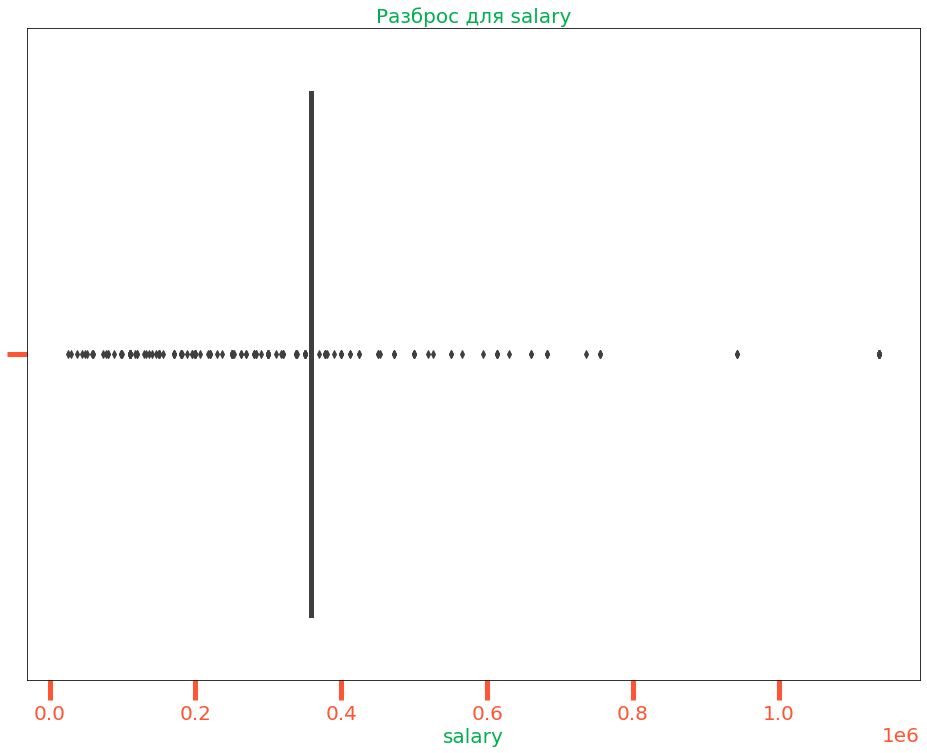

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.boxplot(x=df['salary'])
plt.title('Разброс для salary')
plt.show()

#### Пробуем добавить шума таргету

In [24]:
df = df[(df['salary'] < 800000) & (df['salary'] > 60000)]

def add_noise_to_target(y, noise_level=0.1):
    noise = np.random.normal(0, noise_level, size=y.shape)  # Генерация нормального шума
    return y + noise
df['salary'] = add_noise_to_target(df['salary'], noise_level=0.6)


In [25]:
print(df.shape)
df = df.drop('id', axis=True)

(1632, 117)


In [26]:
df

,role,need_eng,salary,apache airflow,apache kafka,apache nifi,apache spark,api,asinc.io,aws,azure,big data,bioinformatics,blockchain,bokeh,c/c++,caffe,catboost,clickhouse,computer vision,d3.js,data engineer,data science,data scientist,databricks,dataiku,docker,elasticsearch,etl,fast api,fastapi,flask,flutter,git,google analytics,google cloud,google cloud platform,grafana,hadoop,jupyter notebook,keras,kibana,kubernetes,lightgbm,llm,looker,matlab,matplotlib,mlflow,mongodb,mysql,nlp,node.js,nosql,numpy,opencv,osi,pandas,plotly,postgresql,power bi,presto,prometheus,pyspark,python,pytorch,qlikview,r,recommender systems,redis,sas,scikit-learn,seaborn,snowflake,spark,spss,sql,sqlite,streamlit,tableau,tensorflow,wandb,xgboost,анализ временных рядов,анализ данных,аналитика,английский язык,базы данных,визуализация данных,интерпретация данных,искусственный интеллект,компьютерное зрение,математическая статистика,математический анализ,математическое моделирование,машинное обучение,моделирование,нейронные сети,обработка естественного языка,обучение и развитие,прогнозирование,продуктовая аналитика,работа в команде,рекомендательные системы,системы мониторинга,составление семантического ядра,статистика,стремление к профессиональному росту,тайм-менеджмент,is_it_company,employment,experience,schedule,metro,branding,city
1,30,0,97466.279189,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,113,2,2
2,4,1,357868.662247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,29,1,59
5,24,0,357869.179986,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,113,2,59
7,24,0,357869.109312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,113,1,59
9,24,0,357868.780221,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,113,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,26,0,357868.677391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,113,2,59
3224,24,0,357868.952987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,113,1,32
3226,0,0,357867.682540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,113,1,59
3227,24,0,357868.959571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [27]:
!pip install optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error


Y = df['salary']
X = df.drop(['salary'], axis=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
df.dtypes

role                int64
need_eng            int64
salary            float64
apache airflow      int64
apache kafka        int64
                   ...   
experience          int64
schedule            int64
metro               int64
branding            int64
city                int64
Length: 116, dtype: object

#### Попробуем обучить Catboost(MAPE) модель с подбором параметров

In [30]:
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    depth = trial.suggest_int('depth', 4, 10)
    iterations = trial.suggest_int('iterations', 100, 500)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1, 10)
    model = CatBoostRegressor(
        learning_rate=learning_rate,
        depth=depth,
        iterations=iterations,
        l2_leaf_reg=l2_leaf_reg,
        silent=True,
        loss_function='MAPE',
    )
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)
    y_pred = model.predict(X_test)

    return mean_absolute_percentage_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)


catboost_best_params = study.best_params
catboost_best_model = CatBoostRegressor(
    learning_rate=catboost_best_params['learning_rate'],
    depth=catboost_best_params['depth'],
    iterations=catboost_best_params['iterations'],
    l2_leaf_reg=catboost_best_params['l2_leaf_reg'],
    silent=True,
    loss_function='MAPE',
)

catboost_best_model.fit(X_train, y_train)
y_pred = catboost_best_model.predict(X_test)
mape_result = mean_absolute_percentage_error(y_test, y_pred)
avg_inference_time = timeit.timeit(lambda: catboost_best_model.predict(X_test), number=100) / 100
print(f"Лучшие параметры: {catboost_best_params}")
print(f'MAPE: {mape_result}')

Лучшие параметры: {'learning_rate': 0.2948901521371542, 'depth': 5, 'iterations': 442, 'l2_leaf_reg': 4.201320727473874}
MAPE: 0.0842498440552846


In [31]:
mape_result * 100

8.42498440552846

#### Посмотрим на рейтинг признаков

In [32]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(catboost_best_model, threshold='mean', prefit=True)
selected_features = selector.get_support(indices=True)

most_important_features = [X.columns[i] for i in selected_features]
print("Наиболее важные признаки:", most_important_features)

Наиболее важные признаки: ['role', 'need_eng', 'big data', 'docker', 'git', 'google cloud platform', 'mlflow', 'mysql', 'node.js', 'nosql', 'python', 'аналитика', 'английский язык', 'базы данных', 'математический анализ', 'обучение и развитие', 'employment', 'experience', 'schedule', 'branding', 'city']


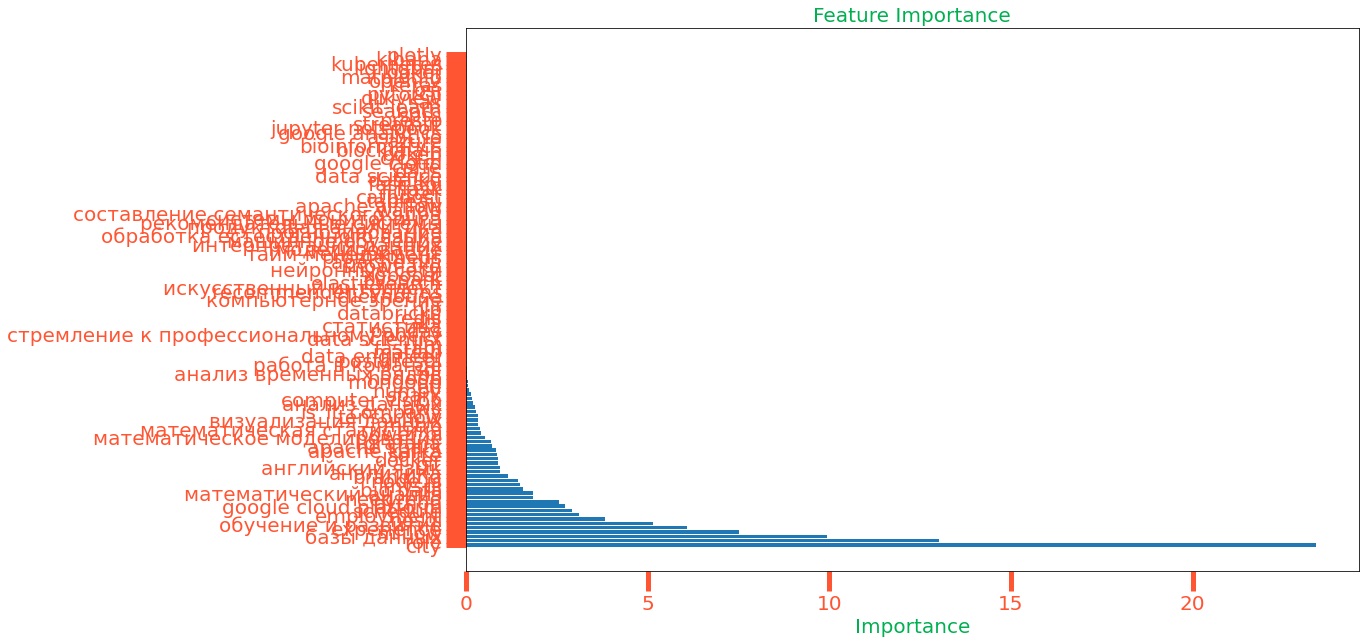

In [33]:
feature_importances = catboost_best_model.get_feature_importance()
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [34]:
imp_value = 0.05
low = importance_df[importance_df['Importance'] < imp_value]
high = importance_df[importance_df['Importance'] > imp_value]
print(f'Всего : {importance_df.shape[0]}')
print(f'Низкий показатель: {low.shape[0]}')
print(f'Высокий показатель : {high.shape[0]}')


Всего : 115
Низкий показатель: 76
Высокий показатель : 39


In [35]:
!pip install shap
import shap

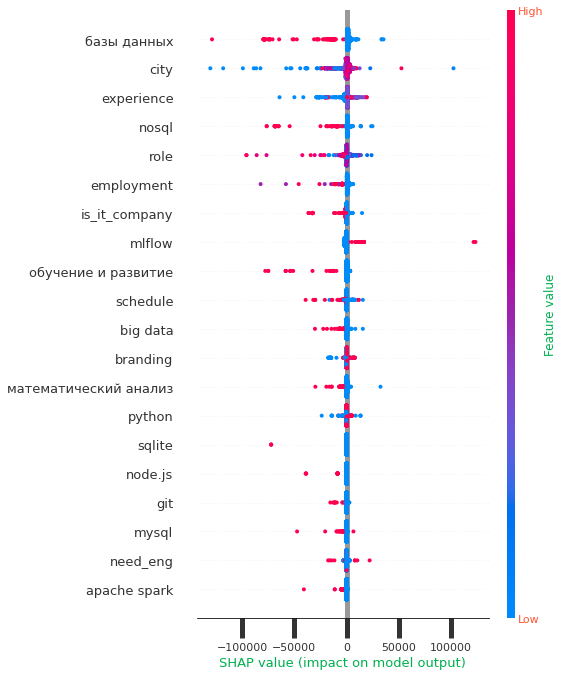

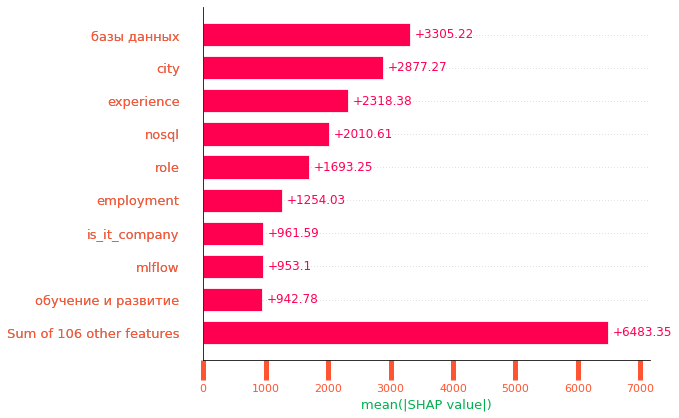

In [36]:
import shap

explainer = shap.Explainer(catboost_best_model)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)
shap.plots.bar(shap_values)

plt.show()

In [37]:
imp_value = 0.6
low = importance_df[importance_df['Importance'] < imp_value]
high = importance_df[importance_df['Importance'] > imp_value]
print(f'Всего : {importance_df.shape[0]}')
print(f'Низкий показатель: {low.shape[0]}')
print(f'Высокий показатель : {high.shape[0]}')


Всего : 115
Низкий показатель: 90
Высокий показатель : 25


In [38]:
low, high

(                          Feature  Importance
 93   математическое моделирование    0.523486
 59                       power bi    0.417697
 91      математическая статистика    0.395323
 112                         metro    0.341527
 87            визуализация данных    0.330399
 ..                            ...         ...
 44                         looker    0.000000
 42                       lightgbm    0.000000
 41                     kubernetes    0.000000
 40                         kibana    0.000000
 57                         plotly    0.000000
 
 [90 rows x 2 columns],
                    Feature  Importance
 114                   city   23.398479
 0                     role   13.020616
 86             базы данных    9.928429
 47                  mlflow    7.512391
 110             experience    6.085162
 98     обучение и развитие    5.156835
 52                   nosql    3.840577
 109             employment    3.120261
 111               schedule    2.918609
 35   goog

#### Еще раз обучим Catboost, на обычном GrivSearch/с удаленными выбросами/с важными фичами/ добавленым шумом к таргету/ + KBinsDiscretizer

In [39]:
imp_value = 0.5
low = importance_df[importance_df['Importance'] < imp_value]
high = importance_df[importance_df['Importance'] > imp_value]
print(f'Всего : {importance_df.shape[0]}')
print(f'Низкий показатель: {low.shape[0]}')
print(f'Высокий показатель : {high.shape[0]}')

Всего : 115
Низкий показатель: 89
Высокий показатель : 26


In [40]:
Y = df['salary']
X = df.drop(['salary'], axis=True)
X = X.drop(low['Feature'], axis=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
X

,role,need_eng,apache kafka,apache spark,big data,docker,git,google cloud platform,grafana,mlflow,mysql,node.js,nosql,python,sqlite,аналитика,английский язык,базы данных,математический анализ,математическое моделирование,обучение и развитие,employment,experience,schedule,branding,city
1,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2
2,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,59
5,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,2,59
7,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,59
9,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,26,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,2,59
3224,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,32
3226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,59
3227,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,59


In [42]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline


Y = df['salary']
X = df.drop(['salary'], axis=True)
X = X.drop(low['Feature'], axis=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('discretizer', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')),
    ('model', CatBoostRegressor(loss_function='MAPE', verbose=0))
])
param_grid = {
    'model__iterations': [100, 200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__depth': [4, 6, 8, 10],
    'model__l2_leaf_reg': [1, 3, 5, 7]
}

grid_search = GridSearchCV(
    estimator=pipeline, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_percentage_error', 
    cv=3
)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
final_mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mape: {final_mape:.4f}")

Best hyperparameters:  {'model__depth': 4, 'model__iterations': 500, 'model__l2_leaf_reg': 7, 'model__learning_rate': 0.2}
Mape: 0.0799


In [43]:
mean_absolute_percentage_error(y_test, y_pred) * 100

7.992350636335689

In [44]:
import joblib

joblib.dump(grid_search.best_estimator_, 'best_catboost_model2.pkl')

['best_catboost_model2.pkl']